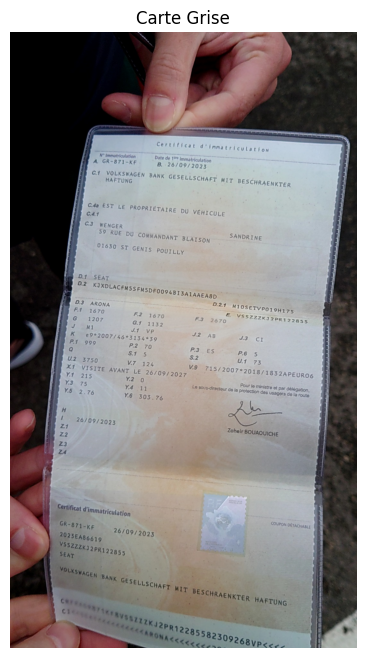

In [7]:
import cv2
import easyocr
import re
import matplotlib.pyplot as plt

# Charger l’image
image_path = '/Users/sebastianonise/Documents/ML/churn-detector/jupyter/data/carte_grise.jpg'
img = cv2.imread(image_path)
cv2.imshow("Carte Grise", img)

# Convertir BGR (OpenCV) → RGB (matplotlib)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Afficher l’image
plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.title("Carte Grise")
plt.axis('off')
plt.show()




In [8]:
# Convertir en niveaux de gris pour meilleure lisibilité
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Initialiser EasyOCR
reader = easyocr.Reader(['fr'])  # supporte bien le français

# Lire le texte
results = reader.readtext(gray, detail=0)

# Fusionner tous les résultats en un seul texte
full_text = "\n".join(results)
print("Texte brut extrait :\n", full_text)

# Exemple de regex pour extraire des infos :
immat = re.search(r"[A-Z]{2}-\d{3}-[A-Z]{2}", full_text)
vin = re.search(r"VF[A-Z0-9]{14}", full_text)
nom_proprietaire = re.search(r"Nom[s]? :?\s*(.+)", full_text)

# Affichage des infos extraites
print("\nInfos extraites :")
if immat:
    print(f"Immatriculation : {immat.group(0)}")
if vin:
    print(f"Numéro VIN : {vin.group(0)}")
if nom_proprietaire:
    print(f"Nom du propriétaire : {nom_proprietaire.group(1)}")

Texte brut extrait :
 Ce rt1 f1ca t
inna
tficulation
N?Immatriculation
Date de
GR -871-KF
immatriculation
26/09/2023
C1
Volkswagen
BANK
HaFTung
Gesellschaft Mit BeschraenkteR
C4 EsT
Le
PROPRIETAIRE
C41
Du VEHICULE
C3
WengeR
59 RUE
Du
COMMANDANT
SANDRINE
01630
St GEnIS
POUILLY
D.1
0.2
0.3
ARONA
0.2.1
F
1670
Miosetvpo19h175
F2
1670
Vss777KJ
1207
G.1
FJ
2670
2 PR 1 ?2855
M1
1132
J1
VP
K
e9*2007/46*3134*39
1.2
AB
J3
P.1
999
CI
P.2
70
Es
S1
P.6
U.2
3750
5.2
U.1
V7
124
73
X1
VISITE AVANT
LE
V9
715/2007*2018,
Y1
215
26/09/2027
/1832APEURO6
Y.2
Y3
75
Ys
Y4
11
Lo
sous-directeur de la protectom
@t par delegabion ,
76
Y.6
303
Ces usagers de la routo
76
26/09/2023
22
'BOUAOUICHE
GR -
COUPON
61
BLAISON
Seat
KJXDLACFMSSFMSDFOO94BISAIAAEA8D
P.3
Pcurlo
mnisto ,
#
Zohelr
22
Certificat
dimmatriculation
'871-Kf
DeTACABLE
26/09/
2023
2023e686619
vssZZZKJ 2PR122855
Seat
Volkswagen
BaNK
Gesellschaft
MIT
BESCHRAENKTER
HAfTUNG
1ZKJ2pR12285582309268VP<832
Foua(<4

Infos extraites :


In [11]:
import cv2
import numpy as np
import pytesseract

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)[1]  # Ajustez le seuil
    return thresh

preprocessed_img = preprocess_image("/Users/sebastianonise/Documents/ML/churn-detector/jupyter/data/carte_grise.jpg")
cv2.imwrite("processed.jpg", preprocessed_img)  # Pour vérification visuelle

ModuleNotFoundError: No module named 'pytesseract'

In [ ]:
def find_template(main_image, template_path):
    template = cv2.imread(template_path, 0)
    res = cv2.matchTemplate(main_image, template, cv2.TM_CCOEFF_NORMED)
    _, _, _, max_loc = cv2.minMaxLoc(res)
    return max_loc  # Retourne les coordonnées (x, y) du motif trouvé

# Exemple pour localiser le code "A." (à créer un template minimal)
coords_A = find_template(preprocessed_img, "template_A.jpg")